In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [51]:
df = pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')

In [52]:
df.shape

(3044, 10)

In [53]:
#Preprocessing
#drop -> remarks column
#set index -> Sr no
#rename column
#convert amount to Rs Cr
#date col
#dropna

In [54]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [56]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [57]:
df.drop(columns=['Remarks'],inplace=True)

In [58]:
df.head(1)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [59]:
df.set_index(['Sr No'],inplace=True)

In [60]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [61]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',#round of invesment series a , series b
    'Amount in USD':'amount'
},inplace=True)

In [62]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [63]:
df['amount'] = df['amount'].fillna('0') #fill 0 where values is Nan

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [65]:
df['amount'] = df['amount'].str.replace(',','') #to remove ,
df['amount'] = df['amount'].str.replace('undisclosed','0') 
df['amount'] = df['amount'].str.replace('unknown','0') 
df['amount'] = df['amount'].str.replace('Undisclosed','0') 

In [66]:
df = df[df['amount'].str.isdigit()]

In [67]:
df['amount'] = df['amount'].astype('float')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [69]:
df.head(1)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0


In [70]:
def to_inr(dollor):
    inr = dollor * 82.5
    return inr/10000000

In [71]:
df['amount'] = df['amount'].apply(to_inr)

In [72]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [73]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [74]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

In [75]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [76]:
df['date'].isnull().sum()

6

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3023 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3023 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [79]:
df = df.dropna(subset=['date','vertical','startup','city','investors','round','amount'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [81]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [82]:
df.to_csv('start_up_cleaned.csv',index=False)

In [83]:
df[df['investors'].str.contains('Mumbai Angels Network')]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
234,2018-06-11,Theranosis,Healthcare,Specialised diagnostics Platform,Hyderabad,Mumbai Angels Network,Seed/ Angel Funding,0.0000
394,2018-01-05,WOTU,E-commerce,Food and Beverages,Bengaluru,"Claris Capital, Mumbai Angels Network",Angel / Seed Funding,0.0000
457,2017-12-14,WeDoSky,Technology,Provides Business Insights using Drone Imaginary,Delhi,Mumbai Angels Network,Private Equity,0.0000
1080,2017-01-18,Vahdam Teas,eCommerce,Online Tea etailer,New Delhi,"Mumbai Angels Network, Fireside Ventures, Sing...",Seed Funding,5.3625


In [84]:
df[df['investors'].str.contains('IDG Ventures')].head()[['date','startup','city','round','amount']]

,date,startup,city,round,amount
Sr No,,,,,
102,2019-04-13,Tripoto,New Delhi,Series B,29.628844
223,2018-07-30,Cure Fit,Bengaluru,Private Equity,990.000000
259,2018-05-02,Bizongo,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Delhi,Private Equity,45.375000
439,2017-12-07,eShakti,Chennai,Debt Funding,18.975000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [86]:
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 990.000000
Lenskart                 495.000000
Bizongo                  206.250000
CureFit                  206.250000
Curefit                  123.750000
Fintellix                123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
Uniphore                  72.600000
POPxo                     70.950000
HealthifyMe               49.500000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Flyrobe                   43.725000
RentMojo                  41.250000
Aasaanjobs                41.250000
Vayana                    33.000000
Agrostar                  33.000000
PlaySimple                33.000000
Blowhorn                  30.112500
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
CreditMantri              20.625000
eShakti                   18.975000
Zimmber                   16.500000
POPxo.com                 16.500000
RentoMojo           

<Axes: ylabel='amount'>

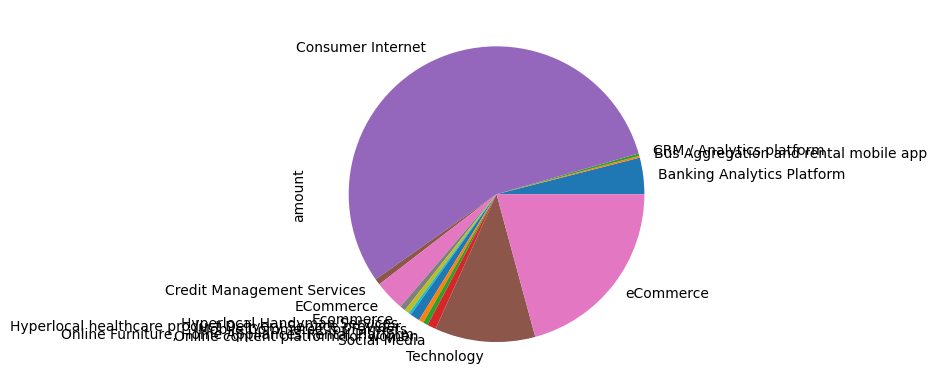

In [87]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [89]:
df['startup']

Sr No
1                             BYJU’S
2                             Shuttl
3                          Mamaearth
4       https://www.wealthbucket.in/
5                             Fashor
                    ...             
2869                          Tracxn
2870                            Dazo
2871                        Tradelab
2872                          PiQube
2873                 Travel Triangle
Name: startup, Length: 2819, dtype: object

In [90]:
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().sort_values(ascending=False)

round
Private Equity    3040.537500
Series B            29.628844
Seed Funding        19.387500
Debt Funding        18.975000
Name: amount, dtype: float64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [92]:
 df[df['investors'].str.contains('IDG Ventures', case=False, na=False)] \
                    .groupby('round')['amount'].sum().sort_values(ascending=False).head(5)

round
Private Equity    3040.537500
Series B            29.628844
Seed Funding        28.462500
Debt Funding        18.975000
Name: amount, dtype: float64

In [95]:
# Step 1: Ensure datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Step 2: Extract 'year' column
df['year'] = df['date'].dt.year

<Axes: xlabel='year'>

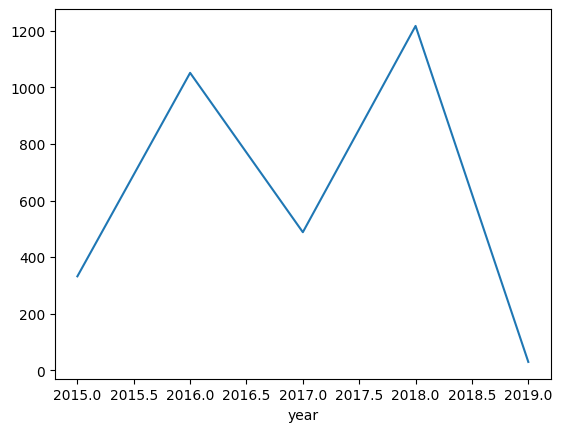

In [101]:
df[df['investors'].str.contains('IDG Ventures', case=False, na=False)].groupby('year')['amount'].sum().plot()


In [102]:
round(df['amount'].sum())

296471

In [103]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32175.0

In [104]:
 df.groupby('startup')['amount'].sum().mean()

129.06885988844144

In [105]:
df['startup'].nunique()

2297

<Axes: xlabel='startup'>

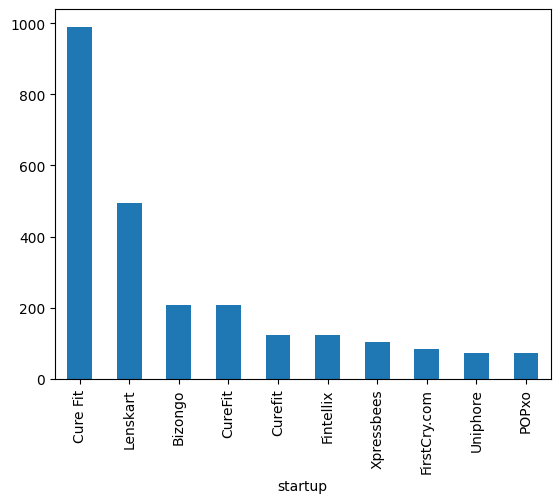

In [110]:
# (\) is use for only break line into new line
df[df['investors'].str.contains('IDG Ventures', case=False, na=False)] \
                        .groupby('startup')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: ylabel='amount'>

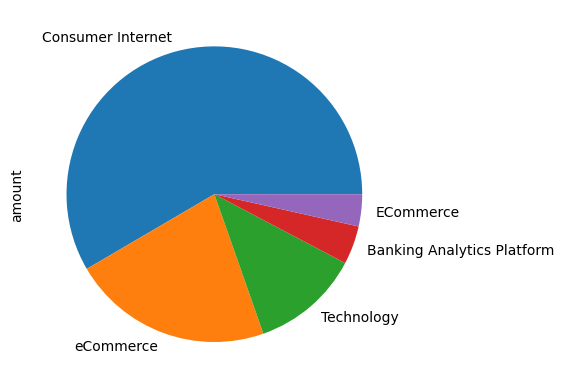

In [111]:
df[df['investors'].str.contains('IDG Ventures', case=False, na=False)] \
                        .groupby('vertical')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')

<Axes: ylabel='amount'>

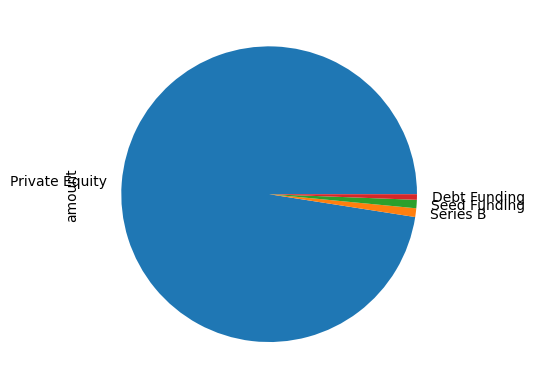

In [113]:
df[df['investors'].str.contains('IDG Ventures', case=False, na=False)] \
                    .groupby('round')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')

<Axes: ylabel='amount'>

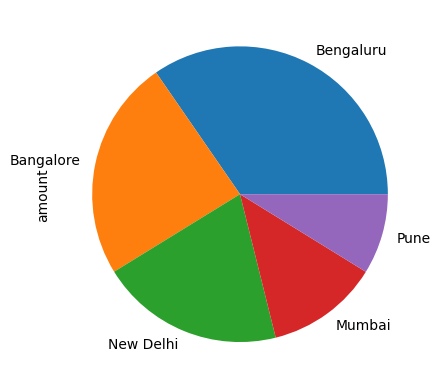

In [114]:
df[df['investors'].str.contains('IDG Ventures', case=False, na=False)] \
                    .groupby('city')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')